In [1]:
import googletrans
print(googletrans.__version__)

4.0.0-rc.1


In [3]:
# Test code for googletrans library
from googletrans import Translator

translator = Translator()
result = translator.translate("Bonjour", dest='en')
print(result.text)

Bonjour


In [37]:
import pandas as pd

# Load data
df = pd.read_csv("keyword_ishowspeed_tweets.csv")

# Data Cleaning
# Display rows with empty text value
print(df[df["text"].isna()], "\n")

# Delete all entries where the text is empty
df.dropna(subset=["text"], inplace=True)

# Drop tweet with language code "zxx" 
# "zxx" language code means "No linguistic content", used when there is no natural language present as the tweet's text only contains URLs or links
df.drop(index=18, inplace=True)

# Reset index after dropping some entries
df.reset_index(drop=True, inplace=True)

print(df[df["text"].isna()])

# Clean HTML entites (e.g., &amp -> &)
df['text'] = df['text'].apply(lambda x: html.unescape(x) if pd.notnull(x) else x)

   created_at text media_type media_url  views_count  quote_count  like_count  \
21        NaN  NaN        NaN       NaN            0          108           0   
22        NaN  NaN        NaN       NaN            0          108           0   
32        NaN  NaN        NaN       NaN            0          108           0   

    reply_count  retweet_count language translated_text  sentiment_score  \
21            0              0      NaN             NaN              NaN   
22            0              0      NaN             NaN              NaN   
32            0              0      NaN             NaN              NaN   

   sentiment_label date  
21             NaN  NaN  
22             NaN  NaN  
32             NaN  NaN   

Empty DataFrame
Columns: [created_at, text, media_type, media_url, views_count, quote_count, like_count, reply_count, retweet_count, language, translated_text, sentiment_score, sentiment_label, date]
Index: []


In [19]:
# First collection of tweets
import html
from langdetect import detect
from googletrans import Translator

# Some tweets are not in English. Hence, we need to detect the language of the text and translate them to English
translator = Translator()

# Detect language 
df['language'] = df['text'].apply(lambda x: detect(x) if pd.notnull(x) else None)

# Translate only non-English tweets
# Return orginal text if encounter tweets already in English
def translate_if_needed(text, lang):
    try:
        if lang != 'en':
            return translator.translate(text, dest='en').text
        return text  # Already in English
    except:
        return text  # If translation fails, return original

df['translated_text'] = df.apply(lambda row: translate_if_needed(row['text'], row['language']), axis=1)
print(df[['text', 'language', 'translated_text']])

                                                 text language  \
0   🚨| WATCH: Speed just met Fabrizio Romano and g...       en   
1   Khabib & IShowSpeed wtf \n#UCLfinal  🤯 https:/...       en   
2   ISHOWSPEED CÉLÈBRE ACTUELLEMENT LA VICTOIRE AV...       en   
3   IShowSpeed a soulevé le trophée de la Ligue de...       fr   
4   Usain Bolt has offered IShowSpeed private coac...       en   
5   iShowSpeed "One Kiss Is All It Takes" Rage (20...       en   
6   🇺🇸 ISHOWSPEED x DÉSIRÉ DOUÉ 🇫🇷 \n\nDEUX GÉNIES...       de   
7   iShowSpeed, American YouTuber,  Stands with  P...       en   
8   IShowSpeed linking up with Dembélé 🇫🇷 before t...       en   
9   IShowSpeed met Fabrizio Romano and got him to ...       en   
10  🚨 LA RÉACTION D’ISHOWSPEED APRÈS LE MAGNIFIQUE...       de   
11  Ishowspeed lift a UCL trophy before Arsenal 😭😭...       en   
12  Achraf Hakimi a accepté de faire la course ave...       fr   
13  IShowSpeed just met Tom Brady and his entire f...       en   
14  IShowS

In [20]:
df.to_csv("keyword_ishowspeed_tweets.csv", index=False)

In [23]:
# Even after using googletrans to detect the language of the tweets, 
# the translator failed to detect the language of the tweet at index 2, where it says the language is en (english) when it is clearly not.
# So in this case, we manually detect the language and manually enter the language for tweet at index 2.

# The language of the tweet at index 2 is french (fr)
df.loc[2, 'language'] = 'fr'

# Now we update the translated_text column of the tweet at index 2
df.loc[2, 'translated_text'] = translate_if_needed(df.loc[2, 'text'], df.loc[2, 'language'])

print(df[['text', 'language', 'translated_text']])

                                                 text language  \
0   🚨| WATCH: Speed just met Fabrizio Romano and g...       en   
1   Khabib & IShowSpeed wtf \n#UCLfinal  🤯 https:/...       en   
2   ISHOWSPEED CÉLÈBRE ACTUELLEMENT LA VICTOIRE AV...       fr   
3   IShowSpeed a soulevé le trophée de la Ligue de...       fr   
4   Usain Bolt has offered IShowSpeed private coac...       en   
5   iShowSpeed "One Kiss Is All It Takes" Rage (20...       en   
6   🇺🇸 ISHOWSPEED x DÉSIRÉ DOUÉ 🇫🇷 \n\nDEUX GÉNIES...       de   
7   iShowSpeed, American YouTuber,  Stands with  P...       en   
8   IShowSpeed linking up with Dembélé 🇫🇷 before t...       en   
9   IShowSpeed met Fabrizio Romano and got him to ...       en   
10  🚨 LA RÉACTION D’ISHOWSPEED APRÈS LE MAGNIFIQUE...       de   
11  Ishowspeed lift a UCL trophy before Arsenal 😭😭...       en   
12  Achraf Hakimi a accepté de faire la course ave...       fr   
13  IShowSpeed just met Tom Brady and his entire f...       en   
14  IShowS

In [24]:
# Save the modifications to the "keyword_ishowspeed_tweets.csv" file
df.to_csv("keyword_ishowspeed_tweets.csv", index=False)

In [38]:
# Second collection of tweets
# Save the modifications first
df.to_csv("keyword_ishowspeed_tweets.csv", index=False)

In [39]:
# Now we update the translated_text of second collection tweets
df.loc[18:, 'translated_text'] = df.loc[18:].apply(lambda row: translate_if_needed(row['text'], row['language']), axis=1)

print(df[['text', 'language', 'translated_text']])

                                                 text language  \
0   🚨| WATCH: Speed just met Fabrizio Romano and g...       en   
1   Khabib & IShowSpeed wtf \n#UCLfinal  🤯 https:/...       en   
2   ISHOWSPEED CÉLÈBRE ACTUELLEMENT LA VICTOIRE AV...       fr   
3   IShowSpeed a soulevé le trophée de la Ligue de...       fr   
4   Usain Bolt has offered IShowSpeed private coac...       en   
5   iShowSpeed "One Kiss Is All It Takes" Rage (20...       en   
6   🇺🇸 ISHOWSPEED x DÉSIRÉ DOUÉ 🇫🇷 \n\nDEUX GÉNIES...       de   
7   iShowSpeed, American YouTuber,  Stands with  P...       en   
8   IShowSpeed linking up with Dembélé 🇫🇷 before t...       en   
9   IShowSpeed met Fabrizio Romano and got him to ...       en   
10  🚨 LA RÉACTION D’ISHOWSPEED APRÈS LE MAGNIFIQUE...       de   
11  Ishowspeed lift a UCL trophy before Arsenal 😭😭...       en   
12  Achraf Hakimi a accepté de faire la course ave...       fr   
13  IShowSpeed just met Tom Brady and his entire f...       en   
14  IShowS

In [40]:
# Save all modifications to the "keyword_ishowspeed_tweets.csv" file
df.to_csv("keyword_ishowspeed_tweets.csv", index=False)

In [41]:
from textblob import TextBlob

# Define a function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis on translated text
df["sentiment_score"] = df["translated_text"].apply(get_sentiment)

# Label sentiments
def label_sentiment(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

df["sentiment_label"] = df["sentiment_score"].apply(label_sentiment)
print(df[['translated_text', 'sentiment_score', 'sentiment_label']])

                                      translated_text  sentiment_score  \
0   🚨| WATCH: Speed just met Fabrizio Romano and g...             0.00   
1   Khabib & IShowSpeed wtf \n#UCLfinal  🤯 https:/...            -0.50   
2   Ishowspeed is currently celebrating the victor...            -0.30   
3   Ishowspeed raised the trophy of the Champions ...             0.00   
4   Usain Bolt has offered IShowSpeed private coac...             0.00   
5   iShowSpeed "One Kiss Is All It Takes" Rage (20...             0.00   
6   🇺🇸 Ishowspeed x desired gifted 🇫🇷\n\nTwo geniu...             0.50   
7   iShowSpeed, American YouTuber,  Stands with  P...             0.00   
8   IShowSpeed linking up with Dembélé 🇫🇷 before t...             0.05   
9   IShowSpeed met Fabrizio Romano and got him to ...             0.00   
10  🚨 Ishowspeed's reaction after the magnificent ...             1.00   
11  Ishowspeed lift a UCL trophy before Arsenal 😭😭...             0.00   
12  Achraf Hakimi agreed to race with 

In [43]:
# Save the sentiment scores and labels to the "keyword_ishowspeed_tweets.csv" file
df.to_csv("keyword_ishowspeed_tweets.csv", index=False)

In [55]:
# Second collection of tweets
# Convert 'created_at' to datetime format
df.loc[18:, "created_at"] = pd.to_datetime(df.loc[18:, "created_at"], format="%a %b %d %H:%M:%S %z %Y")

df.to_csv("keyword_ishowspeed_tweets.csv", index=False)

[<class 'pandas._libs.tslibs.timestamps.Timestamp'>]


In [10]:
# Kernel was resetted
import pandas as pd

df = pd.read_csv("keyword_ishowspeed_tweets.csv")

In [11]:
df["created_at"] = pd.to_datetime(df["created_at"], utc=True, errors="coerce")
print(df["created_at"].apply(type).unique())

df["date"] = df["created_at"].dt.date

[<class 'pandas._libs.tslibs.timestamps.Timestamp'>]


In [12]:
# Save the dates to the "keyword_ishowspeed_tweets.csv" file
df.to_csv("keyword_ishowspeed_tweets.csv", index=False)

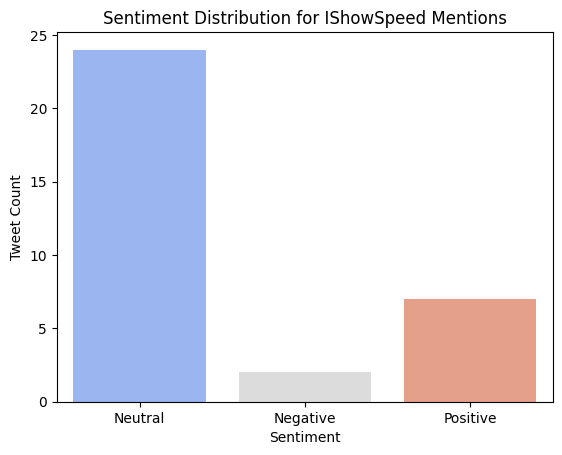

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of each sentiment
sns.countplot(data=df, x="sentiment_label", hue="sentiment_label", palette="coolwarm")
plt.title("Sentiment Distribution for IShowSpeed Mentions")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

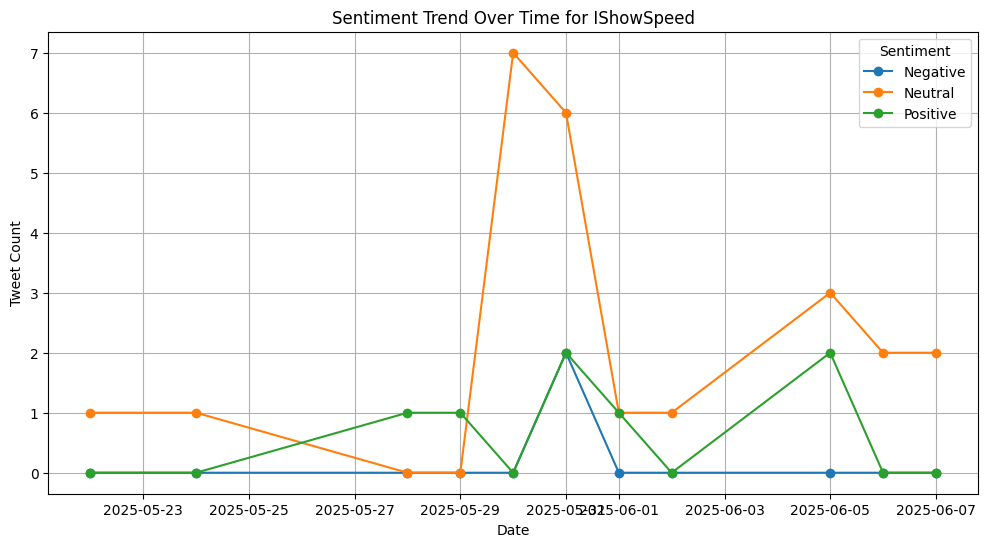

In [14]:
# Group by date and sentiment
trend = df.groupby(["date", "sentiment_label"]).size().unstack().fillna(0)

# Plot sentiment trend
trend.plot(kind="line", marker='o', figsize=(12, 6))
plt.title("Sentiment Trend Over Time for IShowSpeed")
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.legend(title="Sentiment")
plt.grid(True)
plt.show()

In [ ]:
# Neutral sentiment comes from news on IShowSpeed
# Positive sentiment is likely detected from tweets seeming to praise IShowSpeed
# Negative sentiment is likely detected from tweets containing "inappropriate" words like damn and wtf, not necessarily tweets mentioning IShowSpeed negatively